# Importing the Requires Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Uploading and Reading the Train_Data

In [2]:
dt = pd.read_csv("train.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#checking the shape of the dataset
dt.shape

(614, 13)

In [4]:
#summary statistics of the dataset
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#checking the missing the values 
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Droping the column with missing data for numerical and categorical variable

In [7]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean()) 
dt['CoapplicantIncome'] = dt['CoapplicantIncome'].fillna(dt['CoapplicantIncome'].mean())

In [8]:
# fill the missing values for categorical terms
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [9]:
#checking the missing values
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization of the categorical attributes columns

<AxesSubplot:xlabel='Gender', ylabel='count'>

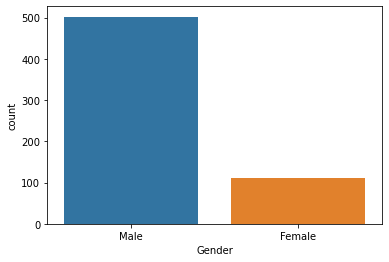

In [10]:
# categorical attributes visualization
sns.countplot(dt['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

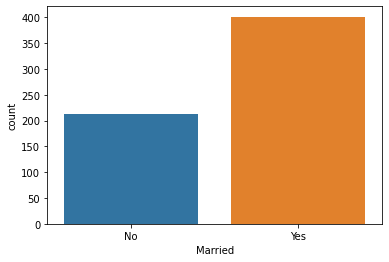

In [11]:
#visualization for the married column on categorical attributes
sns.countplot(dt['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

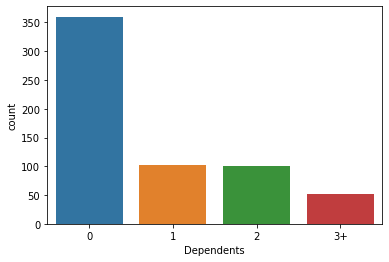

In [12]:
#visualization for the Dependent column
sns.countplot(dt['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

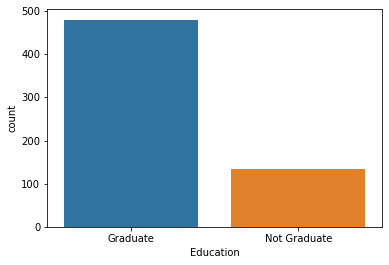

In [13]:
#visualization for the Education column
sns.countplot(dt['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

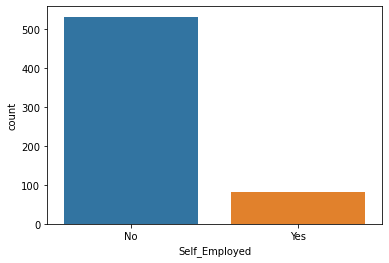

In [14]:
#visualization for the Self_Employed column
sns.countplot(dt['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

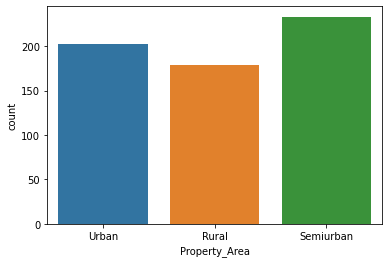

In [15]:
#visualization for the Property_Area column
sns.countplot(dt['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

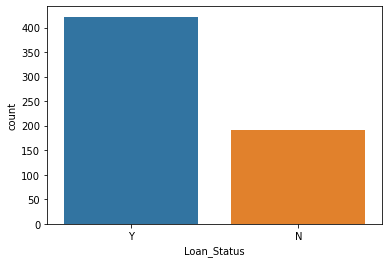

In [16]:
#visualization for the Loan_Status column
sns.countplot(dt['Loan_Status'])

In [17]:
#checking the some head of he data
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
#dropping the columns 
cols = ['CoapplicantIncome', 'Loan_Amount_Term', 'Loan_ID', 'CoapplicantIncome']
dt = dt.drop(columns=cols, axis=1)

In [19]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.000000,1.0,Urban,Y


In [20]:
#applying the labelencoder 
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

<AxesSubplot:>

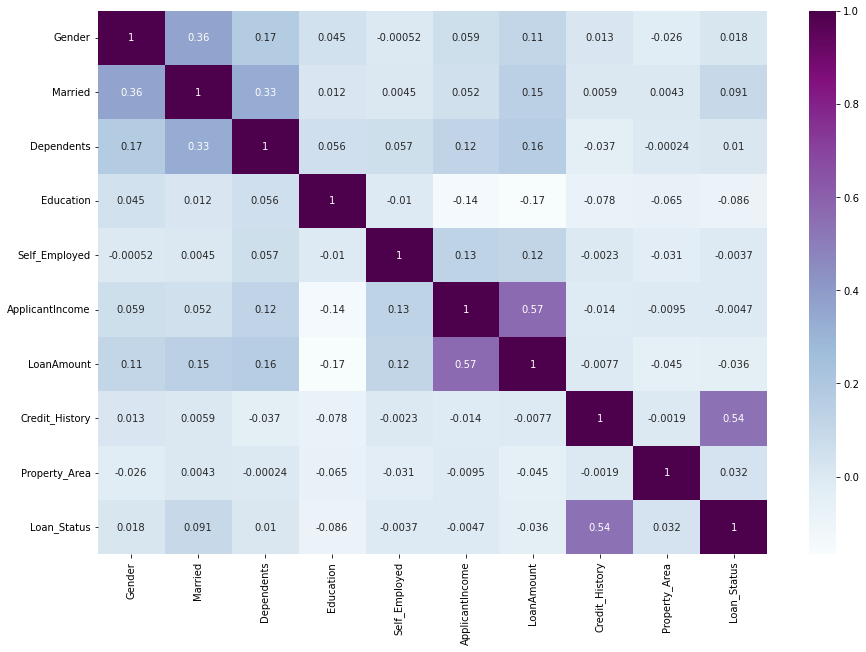

In [21]:
#correlation of the data
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [22]:
#dropping the loan_status columns for looking the target columns
X = dt.drop(columns=['Loan_Status'], axis=1)
y = dt['Loan_Status']

In [23]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0,5849,146.412162,1.0,2
1,1,1,1,0,0,4583,128.000000,1.0,0
2,1,1,0,0,1,3000,66.000000,1.0,2
3,1,1,0,1,0,2583,120.000000,1.0,2
4,1,0,0,0,0,6000,141.000000,1.0,2
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.000000,1.0,0
610,1,1,3,0,0,4106,40.000000,1.0,0
611,1,1,1,0,0,8072,253.000000,1.0,2
612,1,1,2,0,0,7583,187.000000,1.0,2


In [24]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Splitting the dataset in to the training set and test set

In [25]:
#splitting the dataset in to the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [26]:
#applying the logistic regression algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
#printing the model accuracy
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 84.5528455284553


# Model prediction

In [29]:
#predicting the test set results
y_pred = model.predict(x_test)

In [30]:
#importing confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 17],
       [ 2, 88]], dtype=int64)

<AxesSubplot:>

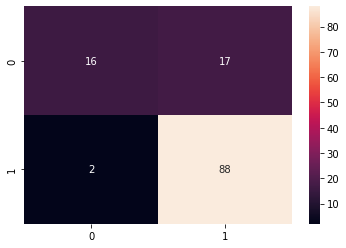

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [32]:
#importing and applying the classification_report
from sklearn.metrics import classification_report
# Predicting the values of test data
#y_pred = classifier.predict(x_test)
print('Classification report - \n', classification_report(y_test, y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.84      0.98      0.90        90

    accuracy                           0.85       123
   macro avg       0.86      0.73      0.77       123
weighted avg       0.85      0.85      0.83       123



In [33]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier()
DTModel.fit(x_train, y_train)
print("Accuracy is", DTModel.score(x_test, y_test)*100)

Accuracy is 66.66666666666666


In [34]:
#predicting the test set results
y_predDT = DTModel.predict(x_test)


In [35]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predDT)
cm

array([[17, 16],
       [25, 65]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
# Predicting the values of test data
#y_pred = classifier.predict(x_test)
print('Classification report - \n', classification_report(y_test, y_predDT))

Classification report - 
               precision    recall  f1-score   support

           0       0.40      0.52      0.45        33
           1       0.80      0.72      0.76        90

    accuracy                           0.67       123
   macro avg       0.60      0.62      0.61       123
weighted avg       0.70      0.67      0.68       123



In [37]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFModel = RandomForestClassifier()

RFModel.fit(x_train, y_train)
print("Accuracy is", RFModel.score(x_test, y_test)*100)

Accuracy is 78.04878048780488


In [38]:
#predicting the test set results
y_predRF = RFModel.predict(x_test)


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)
cm

array([[14, 19],
       [ 8, 82]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
# Predicting the values of test data
#y_pred = classifier.predict(x_test)
print('Classification report - \n', classification_report(y_test, y_predRF))

Classification report - 
               precision    recall  f1-score   support

           0       0.64      0.42      0.51        33
           1       0.81      0.91      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.76      0.78      0.76       123



# Importing the test dataset

In [41]:
#Importing the test dataset
dt1 = pd.read_csv("test.csv")
dt1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [42]:
# fill the missing values for numerical terms
dt1['LoanAmount'] = dt1['LoanAmount'].fillna(dt1['LoanAmount'].mean())
dt1['Loan_Amount_Term'] = dt1['Loan_Amount_Term'].fillna(dt1['Loan_Amount_Term'].mean())
dt1['Credit_History'] = dt1['Credit_History'].fillna(dt1['Credit_History'].mean()) 
dt1['CoapplicantIncome'] = dt1['CoapplicantIncome'].fillna(dt1['CoapplicantIncome'].mean())

In [43]:
# fill the missing values for categorical terms
dt1['Gender'] = dt1["Gender"].fillna(dt1['Gender'].mode()[0])
dt1['Married'] = dt1["Married"].fillna(dt1['Married'].mode()[0])
dt1['Dependents'] = dt1["Dependents"].fillna(dt1['Dependents'].mode()[0])
dt1['Self_Employed'] = dt1["Self_Employed"].fillna(dt1['Self_Employed'].mode()[0])

In [44]:
dt1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [45]:
cols = ['CoapplicantIncome', 'Loan_Amount_Term', 'Loan_ID', 'CoapplicantIncome']
dt1 = dt1.drop(columns=cols, axis=1)

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    dt1[col] = le.fit_transform(dt1[col])

In [47]:
new_pred=model.predict(dt1)

In [48]:
new_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [49]:
prediction=pd.DataFrame(new_pred, columns=['Predictions']).to_csv("predictionLoad.csv")

By comparison the LogisticRegression perform more than the 2 alrogrithm for this model.